<a href="https://colab.research.google.com/github/Meqqqiii/ML/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import requests
from pathlib import Path
from timeit import default_timer as timer
from tqdm.auto import tqdm
import pandas as pd

# Getting Dataset - FasionMNIST

In [3]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, # as we want the training data
    download = True,
    transform = ToTensor(),
    target_transform= None # we want to keep the labels in the original format
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform= None
)

100%|██████████| 26421880/26421880 [00:11<00:00, 2340468.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208448.20it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3876679.59it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5512452.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_names, class_to_idx # our classes and coressponding indecies

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [6]:
image,label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [7]:
image.shape,label # we have a tensor with a size of [1,28,28]
# 1 corelates to color channales (because it's black and white) 28 to height and 28 to width

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, '9')

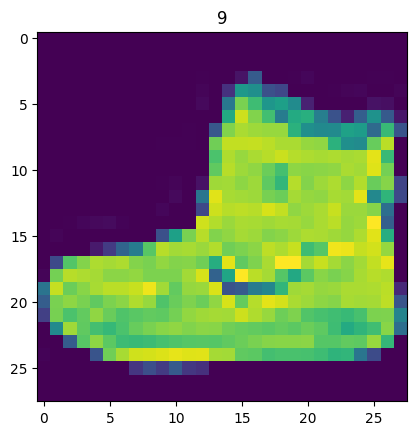

In [8]:
#now let's try to visualise this data using matplotlib
#plt.imshow(image) #if we try to run this code without converting the shape of our tensor we will encounter a type error
#that's because our tensors shape is [Color,Height,Width] and plt uses [Height,Weidht,Color]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

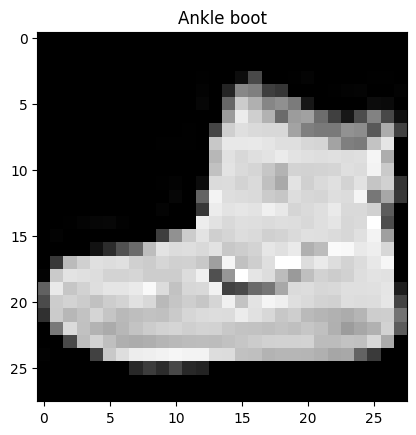

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

This is our origianl image as we use gray color palette

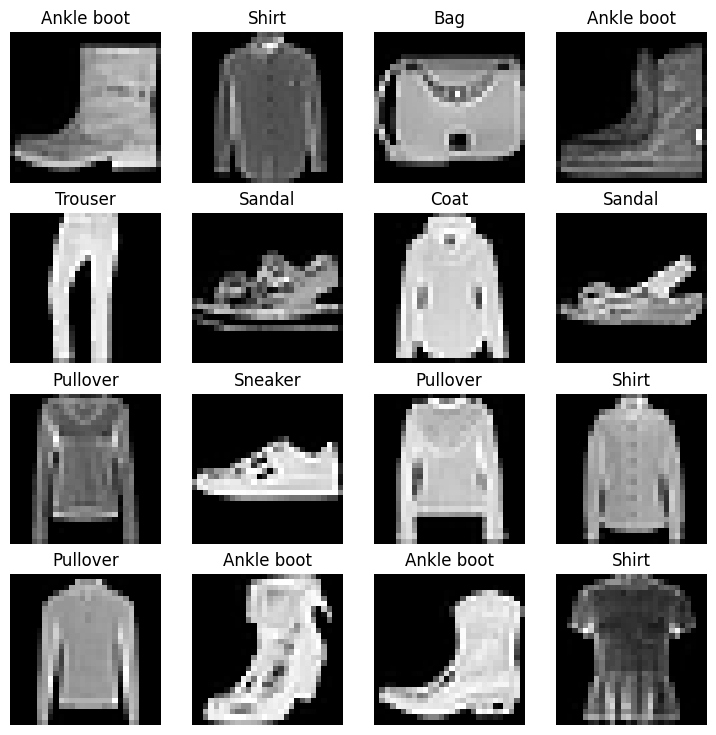

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range (1, rows*cols +1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

In [11]:
# Prepearing DataLoader
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Right now our data is in the from of pytorch dataset and we want to convert it into batches

it would be a lot more efficent to split 60000 images into small parts and let the model learn using these small batches of the data at a time.

this would give our model more chances to update its gradients per epoch

In [12]:
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = 32,
                             shuffle = True) #in case our data goes in order of classes
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e8e7edf3a30>,
 <torch.utils.data.dataloader.DataLoader at 0x7e8e7f303b80>)

In [13]:
print(f" size of train data loader: {len(train_dataloader)}, size of test data loader: {len(test_dataloader)}")

 size of train data loader: 1875, size of test data loader: 313


In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

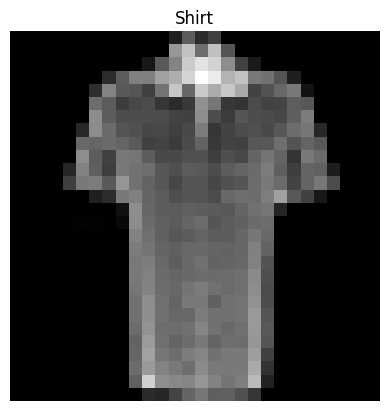

In [15]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img,label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)



We will start with a simple model and improve it acordingly

In [16]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
print(f"Original shape {x.shape}")

output = flatten_model(x)
print(f"Shape after flattening {output.shape}")
print(f"Shape after flattening and squeezing {output.squeeze().shape}")


Original shape torch.Size([1, 28, 28])
Shape after flattening torch.Size([1, 784])
Shape after flattening and squeezing torch.Size([784])


Our base - simplest model, will be linear and linear model can't handle multi dimensional layer so we need it to be single dimensional

In [17]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape))
  def forward(self,x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 28 * 28,
    hidden_units = 10,
    output_shape = len(class_names)
)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

We are working with mulit class data so we will use nn.CrossEntropyLoss as our loss

as an optimizer we will use torch.optim.SGD

In [19]:
if Path("helper_functions.py").is_file():
  print("it already exists skipping download")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


In [20]:
from helper_functions import accuracy_fn

accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end -start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

start_time = timer()

end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu: 0.000 seconds


3.757799998993505e-05

Loop through epochs

loop through traing batches and train them

loop throguh testing batches and test them

time it

and print it


In [22]:
torch.manual_seed(42)
start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    logits = model_0(X)

    loss = loss_fn(logits,y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0 :
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0

  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      test_logits = model_0(X_test)

      test_loss += loss_fn(test_logits, y_test)

      test_acc += accuracy_fn(y_true = y_test,
                              y_pred = test_logits.argmax(dim=1))
    test_loss /= len(test_data)
    test_acc /= len(test_data)
  print(f"epoch : {epoch} | loss: {train_loss:.4f} | test loss {test_loss:.4f} | test acc {test_acc}")
  train_time_end = timer()
  total_train_time = print_train_time(start = start_time,
                                      end = train_time_end,
                                      device = "cpu")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 0 | loss: 0.9433 | test loss 0.0207 | test acc 2.370625
Train time on cpu: 8.407 seconds
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 1 | loss: 0.5870 | test loss 0.0179 | test acc 2.4984375
Train time on cpu: 17.183 seconds
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 2 | loss: 0.5315 | test loss 0.0171 | test acc 2.5309375
Train time on cpu: 25.949 seconds


In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  #returns a dictionary containing the results of model predicting on data_loader
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for (X,y) in tqdm(data_loader):
      X,y = X.to(device), y.to(device)
      y_logits = model(X)

      loss += loss_fn(y_logits, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_logits.argmax(dim = 1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_loss": loss, "model_acc": acc}
model_0_results = eval_model(model = model_0.to(device),
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [24]:

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int,
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [25]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape = 28*28,
                              hidden_units = 10,
                              output_shape= len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.1)

In [27]:
torch.manual_seed(42)
start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_loss = 0
  train_acc = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    X,y = X.to(device), y.to(device)
    y_logits = model_0(X)
    loss = loss_fn(y_logits,y)
    acc = accuracy_fn(y_true=y,
                      y_pred = y_logits.argmax(dim =1))
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f"epoch : {epoch} | loss: {train_loss:.4f} | train acc {train_acc:.4f}")
  train_time_end = timer()
  total_train_time = print_train_time(start = start_time,
                                      end = train_time_end,
                                      device = "cuda")

eval_model(model = model_1,
          data_loader= test_dataloader,
          loss_fn= loss_fn,
          accuracy_fn= accuracy_fn)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 0 | loss: 0.5118 | train acc 81.9083
Train time on cuda: 11.680 seconds
Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 1 | loss: 0.5118 | train acc 81.9083
Train time on cuda: 20.678 seconds
Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 2 | loss: 0.5118 | train acc 81.9083
Train time on cuda: 28.923 seconds


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_loss': tensor(2.3108, device='cuda:0'),
 'model_acc': 12.130591054313099}

In [28]:
def train_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device
               ):
  model.train()
  model.to(device)
  epochs = 3
  torch.manual_seed(42)
  start_time = timer()
  for epoch in  tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n----")
    train_loss = 0
    train_acc = 0
    for batch, (X,y) in enumerate(data_loader):
      X,y = X.to(device), y.to(device)
      y_logits = model(X)
      loss = loss_fn(y_logits, y)
      train_loss += loss
      acc = accuracy_fn(y_true = y,
                        y_pred = y_logits.argmax(dim=1))
      train_acc += acc

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"epoch : {epoch} | loss: {train_loss:.4f} | train acc {train_acc:.4f}")



In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device
               ):
  train_loss, train_acc = 0,0
  model.train()

  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)
    y_logits = model(X)
    loss = loss_fn(y_logits, y)
    train_loss += loss
    acc = accuracy_fn(y_true = y,
                        y_pred = y_logits.argmax(dim=1))
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"epoch : {epoch} | train loss: {train_loss:.5f} | train acc {train_acc:.2f}")



In [30]:
train_step(model = model_1,
           data_loader= train_dataloader,
           loss_fn = loss_fn,
           optimizer = optimizer,
           accuracy_fn =  accuracy_fn,
           device = device)

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 2 | train loss: 0.69442 | train acc 75.25


In [31]:
def test_step(model: torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  model.to(device)
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      y_logits = model(X)
      loss = loss_fn(y_logits,y)
      test_loss +=loss
      acc = accuracy_fn(y_true=y,
                        y_pred=y_logits.argmax(dim=1))
      test_acc += acc
    test_loss = test_loss / len(data_loader)
    test_acc = test_acc /len(data_loader)
  return {print(f"| test loss: {test_loss:.5f}, | test acc: {test_acc:.2f}%\n")}


In [32]:
torch.manual_seed(42)
epochs=3
time_start = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model_1,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
  test_step(model_1,test_dataloader,loss_fn,accuracy_fn,device)
time_end = timer()
total_train_time_model_1 = print_train_time(start=time_start,
                                            end= time_end,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 0 | train loss: 0.47928 | train acc 82.58
| test loss: 0.47015, | test acc: 83.10%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 1 | train loss: 0.44977 | train acc 83.71
| test loss: 0.48975, | test acc: 82.59%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 2 | train loss: 0.43063 | train acc 84.45
| test loss: 0.45756, | test acc: 83.75%

Train time on cuda: 30.571 seconds


# Creating CNN Model

TinyVGG atchitechture

In [33]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
              out_channels = hidden_units,
              kernel_size =3,
              stride =1,
              padding =1
              ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size =2,stride =2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )


  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [34]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
                              #input shape in cnn is a number of color channels in this case we have black and white images so number is 1

In [35]:
torch.manual_seed(42)

images = torch.rand(size=(32,3,64,64)) #single batch (32) of images
test_image = images[0] # single image

print(f"shape of batch of images {images.shape}")
print(f"shape of a single image {test_image.shape}")


shape of batch of images torch.Size([32, 3, 64, 64])
shape of a single image torch.Size([3, 64, 64])


In [36]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding =1)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [37]:
rand_image = torch.rand(size = (1,28,28))
rand_image.shape

torch.Size([1, 28, 28])

In [38]:
rand_image = torch.rand(size = (1,28,28))

model_2(rand_image.unsqueeze(0).to(device))

tensor([[ 3.4667e-02, -7.2086e-02,  5.8438e-02, -4.2425e-02, -1.0303e-02,
          2.1672e-02, -1.1644e-05, -1.2591e-02,  2.2659e-02,  2.4664e-03]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr =0.01)

In [40]:
torch.manual_seed(42)
epochs = 3
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model_2,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
  test_step(model_2,test_dataloader,loss_fn,accuracy_fn,device)
end_time = timer()
total_train_time_model_2 = print_train_time(start_time,end_time,device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 0 | train loss: 1.03786 | train acc 62.33
| test loss: 0.62511, | test acc: 76.91%

Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 1 | train loss: 0.54954 | train acc 80.01
| test loss: 0.49841, | test acc: 81.52%

Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch : 2 | train loss: 0.45569 | train acc 83.51
| test loss: 0.44046, | test acc: 84.21%

Train time on cuda: 47.109 seconds


In [41]:
model_2_results = eval_model(
    model = model_2,
    data_loader= test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_loss': tensor(0.4405, device='cuda:0'), 'model_acc': 84.20527156549521}

In [42]:
model_1_results = eval_model(
    model = model_1,
    data_loader= test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_loss': tensor(0.4576, device='cuda:0'), 'model_acc': 83.74600638977635}

In [43]:
model_0_results = eval_model(
    model = model_0,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_loss': tensor(0.5447, device='cuda:0'), 'model_acc': 80.86062300319489}

In [44]:
results = [model_0_results,model_1_results,model_2_results]

compare = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare

,model_loss,model_acc
0,"tensor(0.5447, device='cuda:0')",80.860623
1,"tensor(0.4576, device='cuda:0')",83.746006
2,"tensor(0.4405, device='cuda:0')",84.205272


In [45]:
def make_predictions(model :torch.nn.Module,
                     data:list,
                     device : torch.device = device):
  pred_probs =[]
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim =0).to(device)
      y_logits = model(sample)
      probs = torch.softmax(y_logits.squeeze(), dim = 0)
      pred_probs.append(probs.cpu())

  return torch.stack(pred_probs)



In [46]:
import random
random.seed(42)
test_samples =[]
test_labels =[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

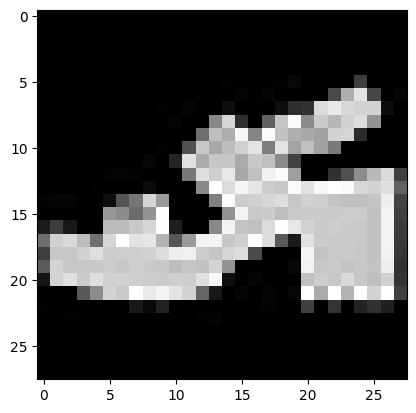

In [47]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")

In [51]:
probs= make_predictions(model_2,
                        test_samples)
probs = probs.argmax(dim=1)
probs

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

<ipython-input-55-90b7bf605e15>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows,ncols, i+1)


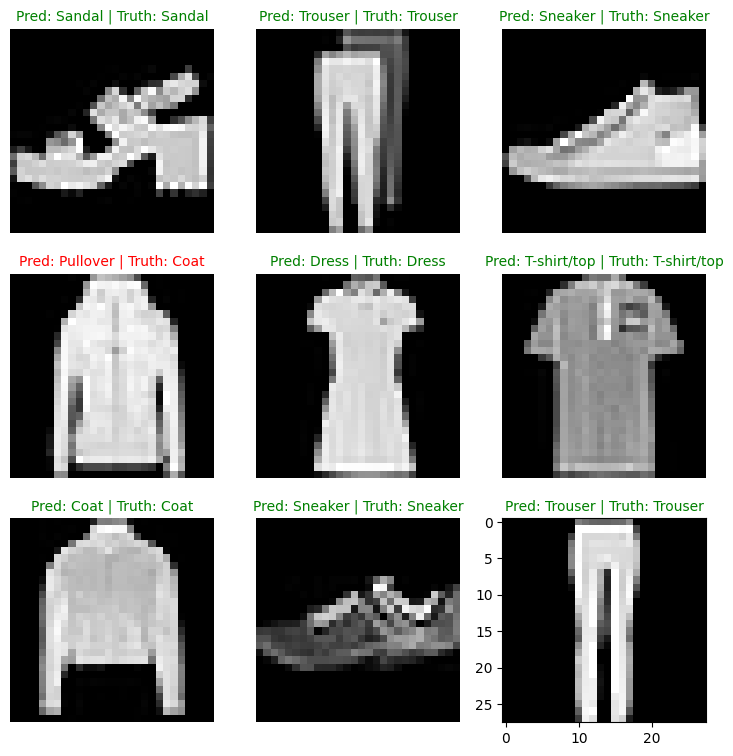

In [55]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
   plt.axis(False)
   plt.subplot(nrows,ncols, i+1)

   plt.imshow(sample.squeeze(),cmap ="gray")

   pred_label = class_names[probs[i]]
   truth_label = class_names[test_labels[i]]

   title_text = f"Pred: {pred_label} | Truth: {truth_label}"
   if pred_label == truth_label:
    plt.title(title_text,fontsize=10, c="g")
   else:
     plt.title(title_text, fontsize =10, c='r')


In [60]:
import mlxtend

y_preds= []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions..."):
    X,y = X.to(device), y.to(device)
    logits = model_2(X)
    y_labels = torch.softmax(logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_labels.cpu())
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 3, 7])

In [63]:
try:
  import torchmetris,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19,"Should be higher than 19.0"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend

In [64]:
import torchmetrics

torchmetrics.__version__

'1.4.2'

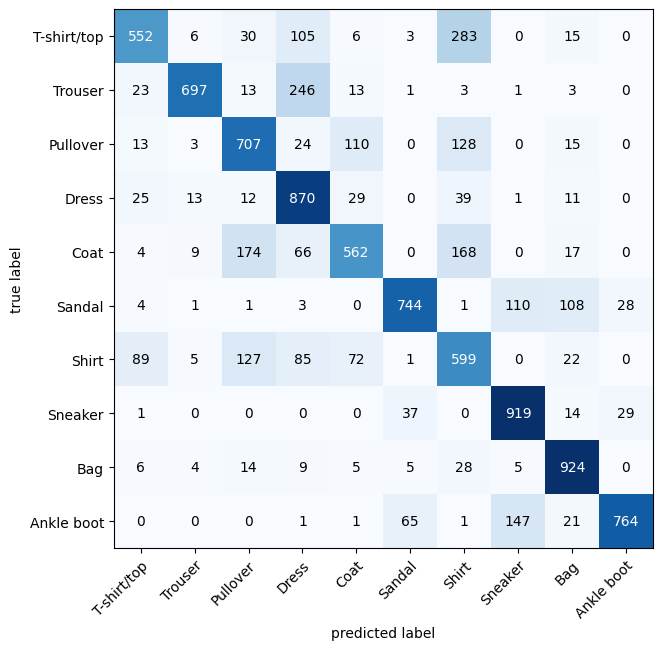

In [67]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#seeting up confusion matrix and comparing it to labels
confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = "multiclass")
confmat_tensor = confmat(preds = y_preds_tensor,
                         target = test_data.targets)

#plot the matrix
fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7)
)

In [69]:
#save the model

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True,
                 exist_ok= True)

MODEL_NAME = "Pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),f = MODEL_SAVE_PATH)

Saving model to: models/Pytorch_computer_vision_model_2.pth


In [71]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape =1,
                                 hidden_units=10,
                                 output_shape = len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-71-bcea63015954>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [76]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    loaded_model_2.to(device),test_dataloader,loss_fn,accuracy_fn
)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

  0%|          | 0/313 [00:00<?, ?it/s]

<ipython-input-76-3ab3d6156346>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.isclose(torch.tensor(model_2_results["model_loss"]),
<ipython-input-76-3ab3d6156346>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(loaded_model_2_results["model_loss"]))


tensor(True, device='cuda:0')